In [377]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import display, Markdown
import seaborn as sns
from src.make_db import create_movies_db

create_movies_db()
con = sqlite3.connect('data/movies.db')

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [478]:
df = pd.read_sql("select * from tn_movie_budgets;", con)
df['production_budget'] = df['production_budget'].str.replace(',', '', regex = True)
df['production_budget'] = df['production_budget'].str.replace('$', '', regex = True).astype(int)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '', regex = True)
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '', regex = True).astype(int)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '', regex = True)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '', regex = True).astype(int)
df.release_date = pd.to_datetime(df.release_date)
df['logged_budget'] = np.log(df['production_budget'])
df['total_gross'] = df['worldwide_gross'] + df['domestic_gross'] 
df['net_profit'] = df['total_gross'] - df['production_budget']
df['return_on_investment'] = df['total_gross'] / df['production_budget']
df = df[(df['release_date'] >= '2010-01-01') & (df['release_date'] <= '2020-01-01')]
month = df['release_date'].apply(lambda x: x.month)
year = df['release_date'].apply(lambda x: x.year)
df['date_month'] = month
df['date_year'] = year

In [479]:
df.groupby('production_budget')

bud_bins = pd.cut(df['production_budget'], [1000000, 5000000, 10000000, 15000000, 20000000, 50000000, 100000000, 200000000, 400000000])
grouped_bins =  df.groupby(bud_bins)['production_budget'].agg(['count'])



In [480]:
df['budget_bins'] = bud_bins

In [481]:
bins = df.budget_bins.unique()[1:]

In [482]:
grouped_bins.loc[bin_]['count']

390

In [487]:

def probability(bins, num):
    probabilities = {}
    for bin_ in bins:
        frame = df[(df.budget_bins == bin_) & (df.return_on_investment >= num)]
        total_in_budget_bin = grouped_bins.loc[bin_]['count']
        number_with_high_ri = frame.shape[0]
        probability = number_with_high_ri/total_in_budget_bin
        probabilities[bin_] = probability
    probabilities = dict(sorted(probabilities.items(), key=lambda x: x[0]))
    return probabilities

In [488]:
probabilities = probability(bins, 2)
probabilities5 = probability(bins, 5)
probabilities7 = probability(bins, 7)
probabilities10 = probability(bins, 10)

AttributeError: 'DataFrame' object has no attribute 'budget_bins'

(0.01, 0.9)

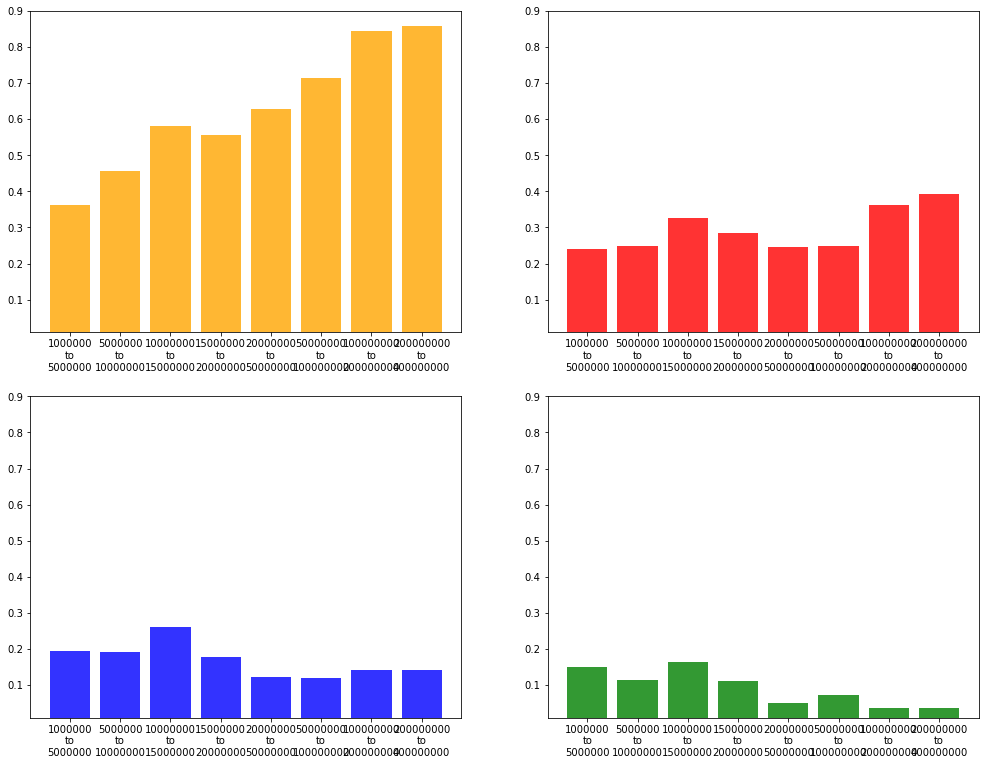

In [489]:
fig, ax = plt.subplots(2, 2, figsize=(17,13))
plt.ylim(.01,.9)
ax[0,0].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities], probabilities.values(), color='orange', alpha=.8)
ax[0,0].set_ylim(.01,.9)
ax[0,1].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities5], probabilities5.values(), color='r', alpha=.8)
ax[0,1].set_ylim(.01,.9)
ax[1,0].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities7], probabilities7.values(), color='b', alpha=.8)
ax[1,0].set_ylim(.01,.9)
ax[1,1].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities10], probabilities10.values(), color='g', alpha=.8)
ax[1,1].set_ylim(.01,.9)
#ax.set_xlabel('budget in dollars')
#ax.set_ylabel('probability that a film recoups its production and marketing budget')

IGNORE EVERYTHING BELOW THIS 

In [490]:
df = pd.read_sql('''SELECT release_date, movie, production_budget, domestic_gross, worldwide_gross, genres
                 FROM tn_movie_budgets AS tn
                 JOIN imdb_title_basics AS imdb
                 ON tn.movie = imdb.primary_title
                 AND 
                 ;''', con)

DatabaseError: Execution failed on sql 'SELECT release_date, movie, production_budget, domestic_gross, worldwide_gross, genres
                 FROM tn_movie_budgets AS tn
                 JOIN imdb_title_basics AS imdb
                 ON tn.movie = imdb.primary_title
                 AND 
                 ;': near ";": syntax error

In [491]:
df.genres

1       Action,Adventure,Fantasy
2        Action,Adventure,Sci-Fi
3        Action,Adventure,Sci-Fi
4        Action,Adventure,Sci-Fi
5       Action,Adventure,Fantasy
                  ...           
3806       Drama,Horror,Thriller
3807                       Drama
3812                Comedy,Drama
3813      Horror,Sci-Fi,Thriller
3814       Drama,Horror,Thriller
Name: genres, Length: 2603, dtype: object

In [582]:
df = pd.read_sql('''SELECT release_date, movie, production_budget, domestic_gross, worldwide_gross, genres, id
                    FROM tn_movie_budgets AS tn
                    JOIN imdb_title_basics AS imdb
                    ON tn.movie = imdb.primary_title
                    ;''', con)
 #SUBSTRING(release_date, CHARINDEX(release_date) + 8, 12) AS year          AND tn.year = imdb.start_year;
df['production_budget'] = df['production_budget'].str.replace(',', '', regex = True)
df['production_budget'] = df['production_budget'].str.replace('$', '', regex = True).astype(int)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '', regex = True)
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '', regex = True).astype(int)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '', regex = True)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '', regex = True).astype(int)
df.release_date = pd.to_datetime(df.release_date)
df['logged_budget'] = np.log(df['production_budget'])
df['total_gross'] = df['worldwide_gross'] + df['domestic_gross'] 
df['net_profit'] = df['total_gross'] - df['production_budget']
df['return_on_investment'] = df['total_gross'] / df['production_budget']
df = df[(df['release_date'] >= '2010-01-01') & (df['release_date'] <= '2020-01-01')]
month = df['release_date'].apply(lambda x: x.month)
year = df['release_date'].apply(lambda x: x.year)
df['date_month'] = month
df['date_year'] = year

In [583]:
df.groupby('production_budget')

bud_bins = pd.cut(df['production_budget'], [1000000, 5000000, 10000000, 15000000, 20000000, 50000000, 100000000, 200000000, 400000000])
grouped_bins =  df.groupby(bud_bins)['production_budget'].agg(['count'])
df['budget_bins'] = bud_bins
bins = df.budget_bins.unique()[1:]
bins = df.budget_bins.unique()[1:]

In [588]:
df_copy = df.copy() #shallow copy
df_copy.genres = df_copy.genres.str.split(',') #this performs the split on the same column of data
df_copy = df_copy.explode('genres') #this explodes the newly created column and saves it to a new df

In [590]:
df_copy.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,id,logged_budget,total_gross,net_profit,return_on_investment,date_month,date_year,budget_bins
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Action,2,19.833130,1286727750,876127750,3.133774,5,2011,NaN
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Adventure,2,19.833130,1286727750,876127750,3.133774,5,2011,NaN
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Fantasy,2,19.833130,1286727750,876127750,3.133774,5,2011,NaN
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Action,3,19.673444,192524700,-157475300,0.550071,6,2019,"(200000000.0, 400000000.0]"
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Adventure,3,19.673444,192524700,-157475300,0.550071,6,2019,"(200000000.0, 400000000.0]"
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Sci-Fi,3,19.673444,192524700,-157475300,0.550071,6,2019,"(200000000.0, 400000000.0]"
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Action,4,19.616420,1862019831,1531419831,5.632244,5,2015,"(200000000.0, 400000000.0]"
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Adventure,4,19.616420,1862019831,1531419831,5.632244,5,2015,"(200000000.0, 400000000.0]"
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Sci-Fi,4,19.616420,1862019831,1531419831,5.632244,5,2015,"(200000000.0, 400000000.0]"
4,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Action,7,19.519293,2726949682,2426949682,9.089832,4,2018,"(200000000.0, 400000000.0]"


In [591]:
df_copy.sort_values(by='return_on_investment',ascending=False).head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,id,logged_budget,total_gross,net_profit,return_on_investment,date_month,date_year,budget_bins
3750,2015-07-10,The Gallows,100000,22764410,41656474,Thriller,80,11.512925,64420884,64320884,644.208840,7,2015,NaN
3750,2015-07-10,The Gallows,100000,22764410,41656474,Mystery,80,11.512925,64420884,64320884,644.208840,7,2015,NaN
3750,2015-07-10,The Gallows,100000,22764410,41656474,Horror,80,11.512925,64420884,64320884,644.208840,7,2015,NaN
3405,2012-01-06,The Devil Inside,1000000,53262945,101759490,Horror,12,13.815511,155022435,154022435,155.022435,1,2012,NaN
3316,2011-04-01,Insidious,1500000,54009150,99870886,Horror,63,14.220976,153880036,152380036,102.586691,4,2011,"(1000000.0, 5000000.0]"
3316,2011-04-01,Insidious,1500000,54009150,99870886,Mystery,63,14.220976,153880036,152380036,102.586691,4,2011,"(1000000.0, 5000000.0]"
3316,2011-04-01,Insidious,1500000,54009150,99870886,Thriller,63,14.220976,153880036,152380036,102.586691,4,2011,"(1000000.0, 5000000.0]"
3406,2015-04-17,Unfriended,1000000,32789645,64364198,Horror,14,13.815511,97153843,96153843,97.153843,4,2015,NaN
3406,2015-04-17,Unfriended,1000000,32789645,64364198,Mystery,14,13.815511,97153843,96153843,97.153843,4,2015,NaN
3406,2015-04-17,Unfriended,1000000,32789645,64364198,Thriller,14,13.815511,97153843,96153843,97.153843,4,2015,NaN


In [539]:
df.groupby('production_budget')

bud_bins = pd.cut(df['production_budget'], [1000000, 5000000, 10000000, 15000000, 20000000, 50000000, 100000000, 200000000, 400000000])
grouped_bins =  df.groupby(bud_bins)['production_budget'].agg(['count'])
df['budget_bins'] = bud_bins
bins = df.budget_bins.unique()[1:]



probabilitiesj = {}
for bin_ in bins:
    frame = df[(df.budget_bins == bin_) & (df.return_on_investment >= 2)]
    total_in_budget_bin = grouped_bins.loc[bin_]['count']
    number_with_high_ri = frame.shape[0]
    probabilityj = number_with_high_ri/total_in_budget_bin
    probabilitiesj[bin_] = probabilityj
probabilitiesj = dict(sorted(probabilitiesj.items(), key=lambda x: x[0]))

Text(0, 0.5, 'probability that a film recoups its production and marketing budget')

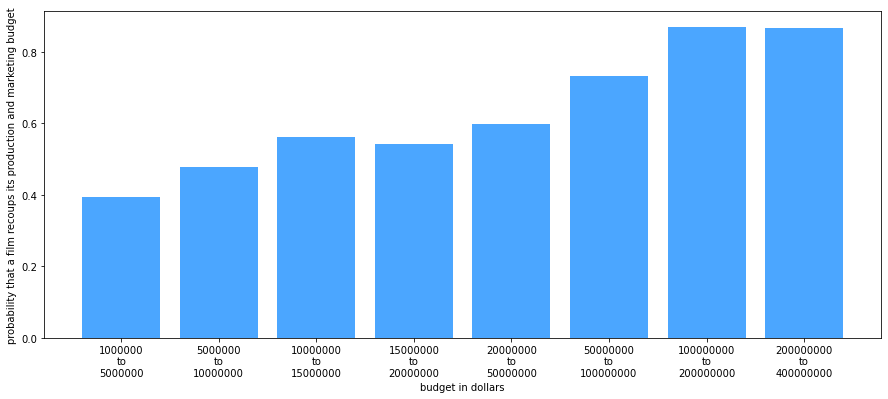

In [547]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar([f'{_.left}\nto\n{_.right}' for _ in probabilitiesj], probabilitiesj.values(), color='dodgerblue', alpha=.8)
ax.set_xlabel('budget in dollars')
ax.set_ylabel('probability that a film recoups its production and marketing budget')

In [541]:
df.groupby('production_budget')

bud_bins = pd.cut(df['production_budget'], [1000000, 5000000, 10000000, 15000000, 20000000, 50000000, 100000000, 200000000, 400000000])
grouped_bins =  df.groupby(bud_bins)['production_budget'].agg(['count'])
df['budget_bins'] = bud_bins

In [542]:
def probability(bins, num):
    probabilities = {}
    for bin_ in bins:
        frame = df[(df.budget_bins == bin_) & (df.return_on_investment >= num)]
        total_in_budget_bin = grouped_bins.loc[bin_]['count']
        number_with_high_ri = frame.shape[0]
        probability = number_with_high_ri/total_in_budget_bin
        probabilities[bin_] = probability
    probabilities = dict(sorted(probabilities.items(), key=lambda x: x[0]))
    return probabilities

In [543]:
probabilities = probability(bins, 2)
probabilities5 = probability(bins, 5)
probabilities7 = probability(bins, 7)
probabilities10 = probability(bins, 10)

(0.0, 0.9)

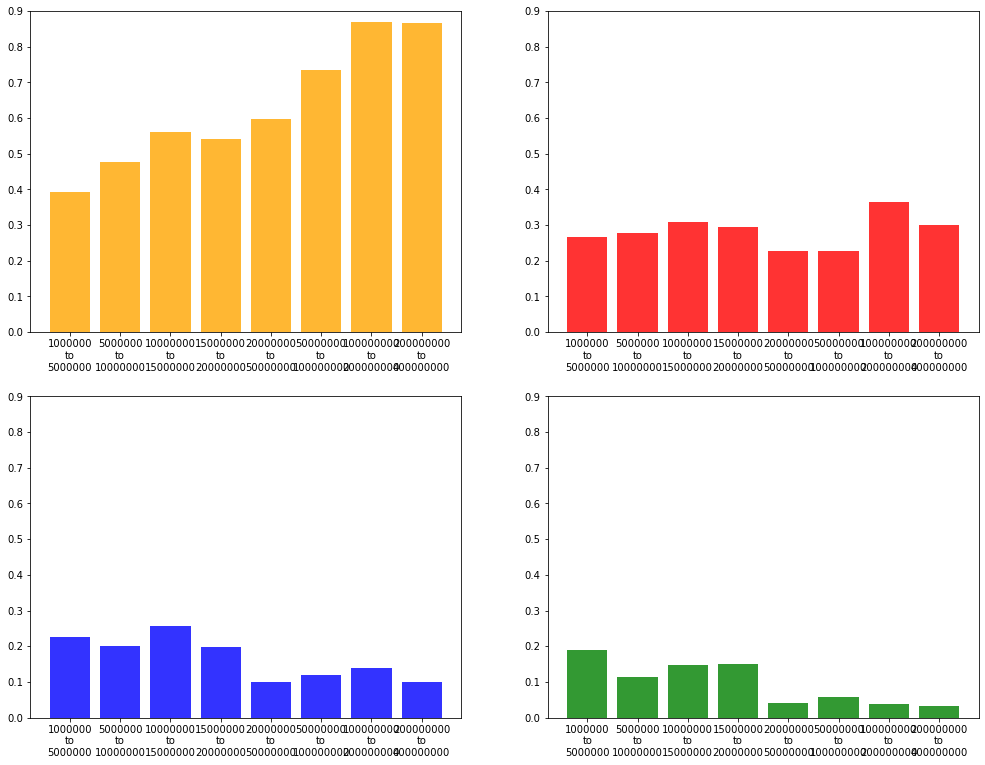

In [546]:
fig, ax = plt.subplots(2, 2, figsize=(17,13))
plt.ylim(.01,.9)
ax[0,0].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities], probabilities.values(), color='orange', alpha=.8)
ax[0,0].set_ylim(.00,.9)
ax[0,1].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities5], probabilities5.values(), color='r', alpha=.8)
ax[0,1].set_ylim(.00,.9)
ax[1,0].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities7], probabilities7.values(), color='b', alpha=.8)
ax[1,0].set_ylim(.00,.9)
ax[1,1].bar([f'{_.left}\nto\n{_.right}' for _ in probabilities10], probabilities10.values(), color='g', alpha=.8)
ax[1,1].set_ylim(.00,.9)